# Analysis of Titanic data to understand the factors that made people more likely to survive


#### Importing libraries

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Importing the CSV

In [2]:
csv = pd.read_csv("titanic-data.csv")

#### Look at the first 10 observations

In [3]:
csv.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Looking at the length of the dataset

In [4]:
csv_length = len(csv)
csv_length

891

#### Looking at the dataset information

In [5]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Description of the data

In [94]:
csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Let us start with understanding where people embarked from the most?

We can see that most people (About 73%) embarked in Southampton. Another 19% from Cherbourg and the rest from Queenstown. 

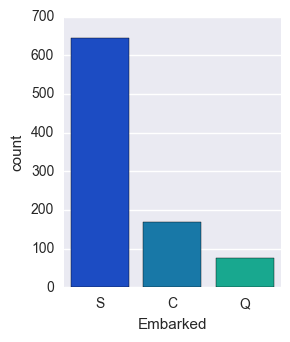

In [90]:
g = sns.factorplot("Embarked",data=csv[csv.Embarked.notnull()],
                 kind="count", size=3.5, aspect=.8,palette='winter')

#### What is the make up of the passengers? Male vs Female

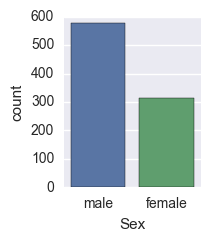

In [16]:
g = sns.factorplot("Sex",data=csv[csv.Sex.notnull()],
                 kind="count", size=2.5, aspect=.8)

#### Sex of the passenger by Class of Reservation

We see that there are more Men than women on the Ship. Let us look at a class wise distribution of the Genders. 

* We see that the most women AND men are in the third class
* Men outnumber women in all three classes

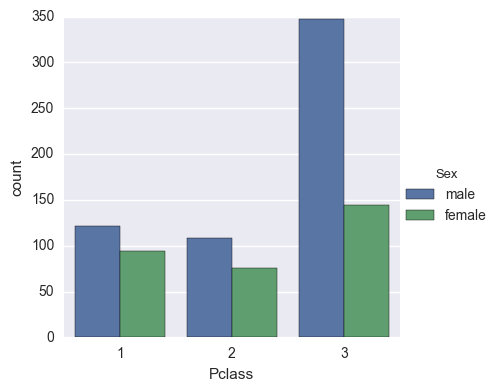

In [78]:
sns.factorplot('Pclass', data=csv, hue='Sex',kind = 'count')

#### What is the mean age of the passengers in the Titanic?

The mean age of a passenger in the titanic is about 30 years. The average age of a female passenger is about 28 years and male is about 31 years. 

In [74]:
csv['Age'].mean()


29.69911764705882

In [75]:
csv.groupby('Sex', as_index=False).Age.mean()

,Sex,Age
0,female,27.915709
1,male,30.726645


#### As we can see, Male passengers out number female passenger almost 2 to 1. But how many of these are kids? 
We will recode the Age variable to create a new variable called Age_Category to simplify the histogram.

* We have 113 Children under 18
* Only 5 people over 70
* Most common demographic on the ship is people Over 18 and Under 30


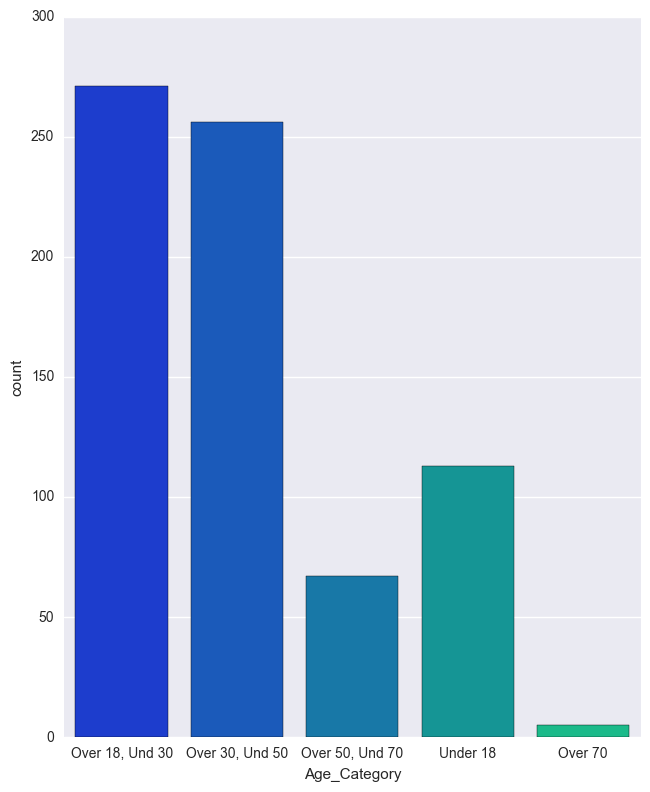

In [92]:
def age_cat(row):
    if row['Age'] > 70:
        return 'Over 70'
    if row['Age'] >= 50 and row['Age'] < 70:
        return 'Over 50, Und 70'
    if row['Age'] >= 30 and row['Age'] < 50:
        return 'Over 30, Und 50'
    if row['Age'] >= 18 and row['Age'] < 30:
        return 'Over 18, Und 30'
    if row['Age'] < 18:
        return 'Under 18'

csv['Age_Category'] = csv.apply (lambda row: age_cat (row),axis=1)

g = sns.factorplot("Age_Category",data=csv[csv.Age_Category.notnull()],
                 kind="count", size=8, aspect=.8,palette = 'winter')

In [76]:
csv['Age_Category'].value_counts()

Over 18, Und 30    271
Over 30, Und 50    256
Under 18           113
Over 50, Und 70     67
Over 70              5
Name: Age_Category, dtype: int64

#### Age Category by Gender

If we want to see that age category by sex, we can find get deeper insights into the demographics of the gender.

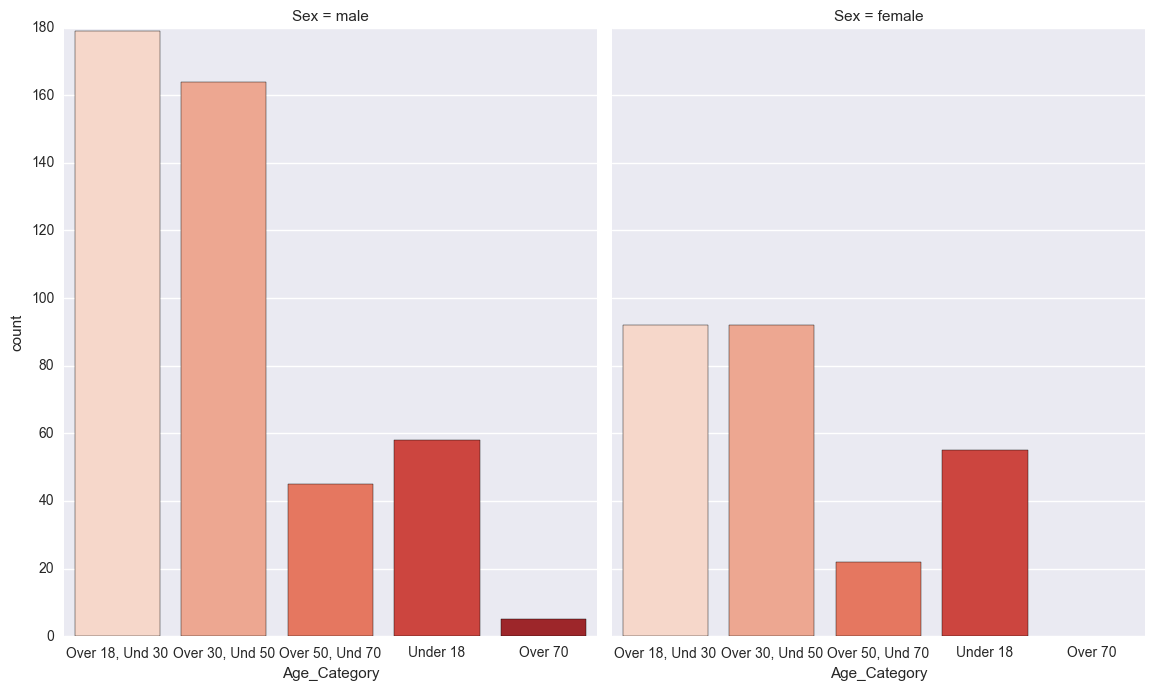

In [91]:
g = sns.factorplot("Age_Category", col="Sex", col_wrap=4,
                  data=csv[csv.Sex.notnull()],
                 kind="count", size=7, aspect=.8,palette = 'Reds')

## Now that we have explored the data a little bit, let us start looking at some possible factors that might affect survivability on the Titanic

#### Does age affect survavibility?

##### Does being younger or older affect survavibility on the titanic? We will look at a percent of people who have survived vs not survived in each age category

As we can see, more people **under 18** survived than did not (**54% survived**). If you are **between 18 and 30**, only **35%** people survived. **41%** survival rate for people **between 30 and 50**. **39%** survival rate for people between the ages **50 and 70**. The survival rate for people **over 70** is a dismal **20%**

**Conclusion : Your chances of survival are highest if you are under 18 and dismal if you are over 70. **

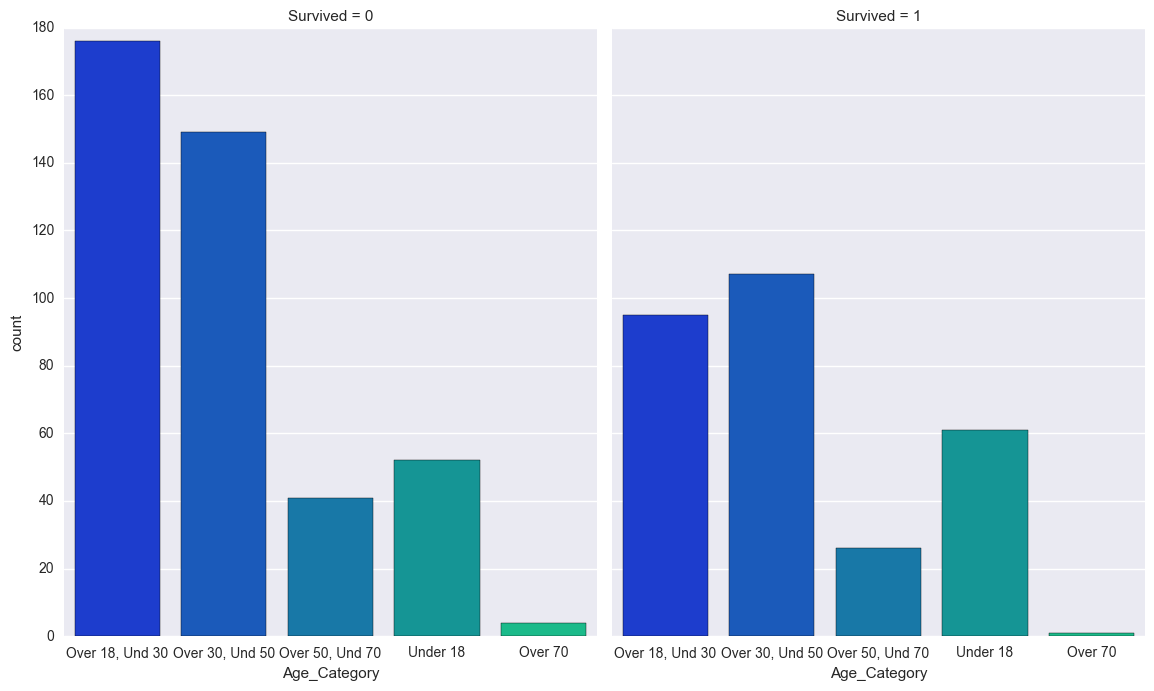

In [99]:
g = sns.factorplot("Age_Category", col="Survived", col_wrap=4,
                  data=csv[csv.Survived.notnull()],
                 kind="count", size=7, aspect=.8,palette = 'winter')

#grouped = csv.groupby(['Age_Category', 'Survived'])
#grouped.size()

#### Does gender affect Survivability?

As we can see if you are **FEMALE**, your survival rate is about 75%. If you are **MALE**, the survival rate is about 18.9%

**Conclusion : You had a better chance of survival if you are female than male. **

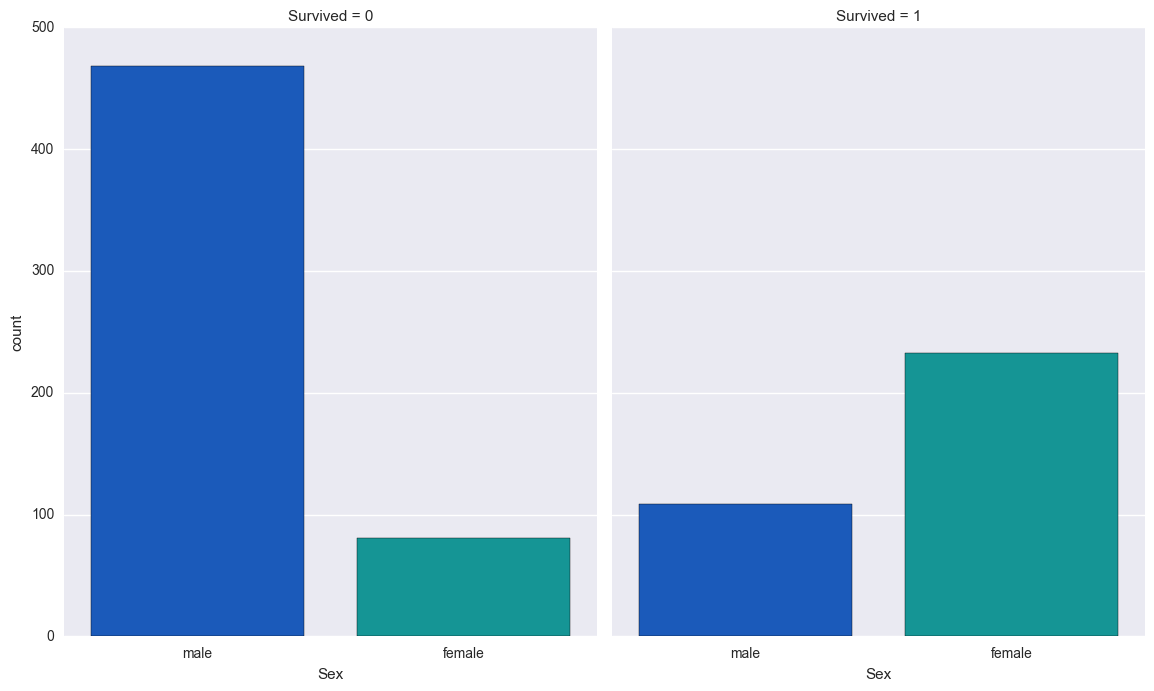

In [102]:
g = sns.factorplot("Sex", col="Survived", col_wrap=4,
                  data=csv[csv.Survived.notnull()],
                 kind="count", size=7, aspect=.8,palette = 'winter')

#grouped = csv.groupby(['Sex', 'Survived'])
#grouped.size()

#### Does having a sibling or spouse affect if you survive the sinking?

** Conclusion : It is evident that the less number of dependents you had, the more chances you survived. But the group with the highest survival rate is the one with 1 dependent or 2 dependents. This is probably because the dependents might be a kid and this might have added to their chances.**

Below is a breakdown of the survival percentages based on number of dependents. 

0 : 34%    
1 : 54%    
2 : 46%    
3 : 25%    
4 : 17%    
5 : 0%  
8 : 0%  

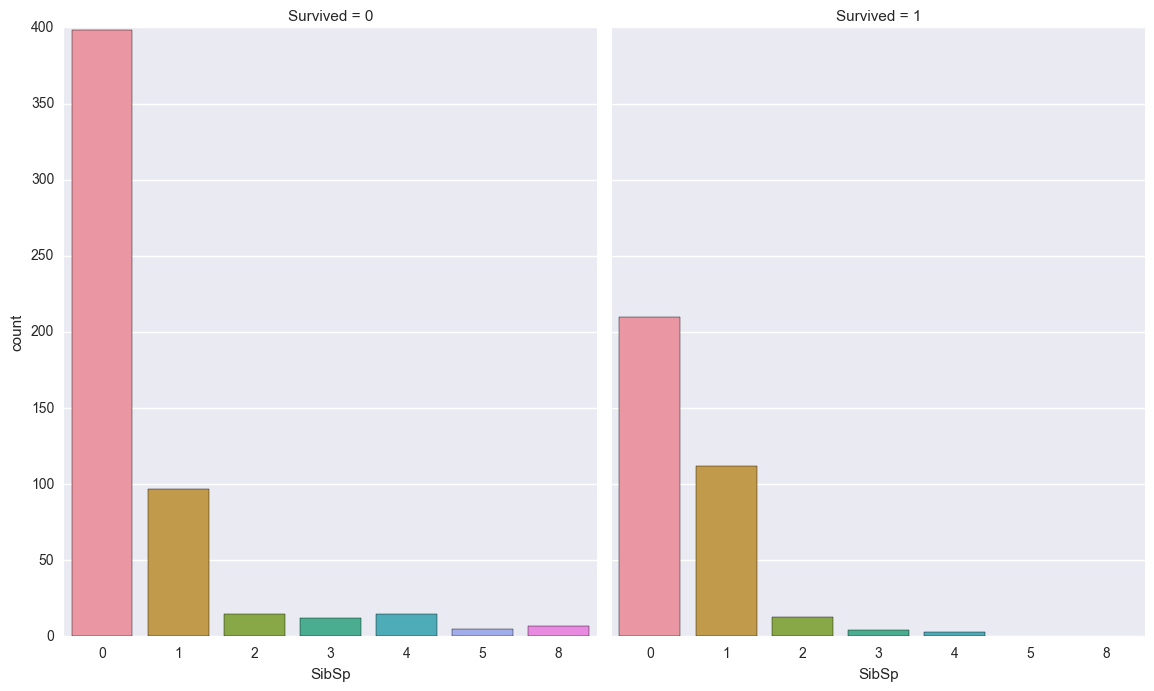

In [104]:
g = sns.factorplot("SibSp", col="Survived", col_wrap=4,
                  data=csv[csv.Survived.notnull()],
                 kind="count", size=7, aspect=.8)

#grouped = csv.groupby(['SibSp', 'Survived'])
#grouped.size()

#### Does being in a higher or a lower class affect survivability?

As we can see, more people (63%) in first class survived the sinking. In second class, the survival rate is about 47%. In third class, it dramatically drops to 24%.

In [105]:
grouped = csv.groupby(['Pclass', 'Survived'])
grouped.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

## Findings and Conclusion

Here is what we can conclude from the above analysis :

#### Interesting exploratory Findings 

* More people embarked from Southampton than any other port (73%)
* Men on the boat outnumber women 2 to 1
* Most common demographic on the ship is people Over 18 and Under 30
* There are no women over 70 on the ship

#### Conclusion

* Your chances of survival are highest if you are under 18 and dismal if you are over 70
* You had a better chance of survival if you are female than male.
* The less number of dependents you had, the more chances you survived
* The higher the class of booking, the higher your chances of survival. First class had a 63% survival rate